In [0]:
#Mounting the google drive to access the images in Google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!ls "/content/drive/My Drive/"


'240 lab1.docx'
'255 Project'
'257 assignment excel.xlsx'
'3RD REVIEW.pptx'
 abhi.7z
 Classification_Regression_Week3-1.pdf
 CMPE180A-F18-Q1-Solution-Gomez.pdf
'CMPE 257 lab 1.docx'
'Colab Notebooks'
'Copy of F1 Visa Coaching - Persona Questions.gdoc'
'data analysis books'
 DeepLearning_Week4-1.pdf
 Dimensionality_Reduction_Week6.pdf
 Distracted_Drivers
 driver
 Ensemble_Methods_Dimensionality_Reduction_Week5-1.pdf
'Final Project.pdf'
'fire_elev (1).ipynb'
'google jam 1.jpg'
'google jam completion.jpg'
'i20 sevis fee admit letter and passport.gdoc'
'i20 sevis fee admit letter and passport.pdf'
 image001.jpg
'immunization proof.pdf'
 Introduction_Wk1-2.pdf
 kc_house_data.csv
 KC_Housing_Basic.ipynb
 KC_Housing_LinearRegression.ipynb
 KC_Housing_NN_Regression.ipynb
'Lab 1 Machine learning assignment.ipynb'
'lor latest'
'Midterm Format.pdf'
'music balvikas and drawing certificate.pdf'
'passport and visa.pdf'
'php proj'
 Similarity_Proximity_Wk2-1.pdf
 Terrainwf.ipynb
 test5.cpp
'transfer 

In [0]:
#Importing the required packages
import numpy as np 
import pandas as pd 
import os

In [0]:
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers
from keras.optimizers import SGD
from glob import glob
import cv2
import warnings 
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.losses import categorical_crossentropy
from keras.models import Model
from keras.models import load_model
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid

In [0]:
import tensorflow as tf
import time

In [0]:
#Saving the directory in the google drive which contains the train and test directories
root_directory ='/content/drive/My Drive/Distracted_Drivers'

In [0]:
train_directory = os.path.join(root_directory, 'train')
test_directory = os.path.join(root_directory, 'test')

In [0]:
#Finding out the number of images for each classes
classifications = os.listdir(train_directory)
for classes in classifications:
    if classes != '.DS_Store':
        print('{}: {} images'.format(classes, len(os.listdir(os.path.join(train_directory, classes)))))


c4: 2334 images
c2: 2325 images
c7: 2002 images
c6: 2325 images
c9: 2139 images
c1: 2269 images
c5: 2312 images
c0: 2489 images
c3: 2346 images
c8: 1911 images


In [0]:
#Creating a dataset with the image directories and class labels to access the images
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
train = []
for classKey, classValue in enumerate(class_list):
    for file in os.listdir(os.path.join(train_directory, classValue)):
        train.append(['train/{}/{}'.format(classValue, file), classKey, classValue])
        
training_data = pd.DataFrame(train, columns=['image', 'class_key', 'class_value'])
training_data.head(10)

,image,class_key,class_value
0,train/c0/img_63126.jpg,0,c0
1,train/c0/img_63140.jpg,0,c0
2,train/c0/img_63152.jpg,0,c0
3,train/c0/img_6326.jpg,0,c0
4,train/c0/img_63314.jpg,0,c0
5,train/c0/img_63318.jpg,0,c0
6,train/c0/img_63345.jpg,0,c0
7,train/c0/img_63349.jpg,0,c0
8,train/c0/img_63389.jpg,0,c0
9,train/c0/img_63398.jpg,0,c0


In [0]:
#Finding out the total number of class labels
class_numbers = len(np.unique(training_data["class_key"]))
print("number of classes in the given images: ", class_numbers)

number of classes in the given images:  10


In [0]:
#Performing the test-train split
from sklearn.model_selection  import train_test_split
output = training_data["class_key"]

test_size = 0.30
seed = 10
X_train, X_val, y_train, y_val = train_test_split(training_data, output, test_size=test_size, random_state=seed)

In [0]:
print("Dimensions of the training dataset: {}".format(X_train.shape))
print("Dimensions of the validation dataset: {}".format(X_val.shape))

Dimensions of the training dataset: (15716, 3)
Dimensions of the validation dataset: (6736, 3)


In [0]:
#Function to resize the images
import cv2
from keras.preprocessing import image
def resize_images(image_location, size):
    original_image = cv2.imread(os.path.join(root_directory, image_location))
    resized_image = cv2.resize(original_image, size, interpolation = cv2.INTER_AREA)  
    image_dimension = image.img_to_array(resized_image)
    image_dimension = np.expand_dims(image_dimension.copy(), axis=0)
    return image_dimension

In [0]:
#Resizing the images and finding the X and Y parameters for train and validation dataset
dim_inp = 128

# reading image file for traing dataset
X_train_parameters = np.zeros((len(X_train), dim_inp, dim_inp, 3), dtype='float32')
for i, file in enumerate(X_train['image']):
    data_image = resize_images(file, (dim_inp, dim_inp))
    print("Image resized")
    X_train_parameters[i] = data_image
print('Training Images shape: {} size: {:,}'.format(X_train_parameters.shape, X_train_parameters.size))

# reading image file for validation dataset
X_val_parameters = np.zeros((len(X_val), dim_inp, dim_inp, 3), dtype='float32')
for i, file in enumerate(X_val['image']):
    data_image = resize_images(file, (dim_inp, dim_inp))
    X_val_parameters[i] = data_image
print('Validation Images shape: {} size: {:,}'.format(X_val_parameters.shape, X_val_parameters.size))

Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image resized
Image 

In [0]:
X_train_parameters = X_train_parameters.astype('float32')/255
X_val_parameters = X_val_parameters.astype('float32')/255

In [0]:
y_train_category = keras.utils.to_categorical(y_train, num_classes=class_numbers)
y_val_category = keras.utils.to_categorical(y_val, num_classes=class_numbers)

In [0]:
print("Training data shape:")
print("Features: ",X_train_parameters.shape)
print("Target: ",y_train_category.shape)

Training data shape:
Features:  (15716, 128, 128, 3)
Target:  (15716, 10)


In [0]:
print("\nValidation data shape:")
print("Features: ",X_val_parameters.shape)
print("Target: ",y_val_category.shape)

In [0]:
#Function to plot a graph for accuracy and loss
def accuracy_loss_plot(model_history):
    fig, axis = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axis[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axis[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axis[0].set_title('Model Accuracy')
    axis[0].set_ylabel('Accuracy')
    axis[0].set_xlabel('Epoch')
    axis[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axis[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axis[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axis[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axis[1].set_title('Model Loss')
    axis[1].set_ylabel('Loss')
    axis[1].set_xlabel('Epoch')
    axis[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axis[1].legend(['train', 'val'], loc='best')
    plt.show()

#Function to convert the predicted y value to one dimension
    def one_dimension_y_prediction(y_pred):
    result = []
    for i in range(len(y_pred)):
        result.append(np.where(y_pred[i] == np.max(y_pred[i]))[0][0])
    return result  

#Function to plot the confusion matrix
    def confusion_matrix(cnf_matrix, name):
    fig, axis = plt.subplots(1, figsize=(12,5))
    axis = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
    axis.set_xticklabels(class_list)
    axis.set_yticklabels(class_list)
    plt.title('Confusion Matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    fig.savefig('{}_cnf.png'.format(name), dpi=300)
    plt.show();

 #Function to implement early stopping
    def estimate_early_stop():

    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

    model_checkpoint =  ModelCheckpoint('bestmodel.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='auto',
                                                               period=1)
    return early_stopping, model_checkpoint                         

In [0]:
def build_model():
    resnet = ResNet50(include_top=False, input_shape=(224, 224, 3))
    
    model = Sequential()
    model.add(resnet)
    model.add(Flatten())
    model.add(Dense(1024, activation = "relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(Dense(10, activation='softmax'))   
    model.summary()
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    return resnet, model

In [0]:
def define_resnet(resnet):    
    model = Sequential()
    model.add(resnet)
    model.add(Flatten())
    model.add(Dense(1024, activation = "relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(Dense(10, activation='softmax'))   
    model.summary()
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
    return  model

In [0]:
#Printing the model summary for ResNet
model = ResNet50(include_top=False, input_shape=(128, 128, 3))
model.summary()













94658560/94653016 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
______________

In [0]:
cnn_resnet = define_resnet(model)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
____

In [0]:
#Building the model with early stopping checkpoint
es,mod_check = estimate_early_stop()

# Train the model
start_time = time.time()

model_history = cnn_resnet.fit(X_train_parameters, y_train_category, # feature and target vector
          validation_data=(X_val_parameters, y_val_category), # data for evaluation
          epochs=50, 
          batch_size=64, # Number of observations per batch
          verbose=1,     # Print description after each epoch
          callbacks=[es,mod_check])

end_time = time.time()
execution_duration = end - start;

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15716 samples, validate on 6736 samples
Epoch 1/50
15716/15716 [==============================] - 67s 4ms/step - loss: 0.7500 - acc: 0.7785 - val_loss: 0.0437 - val_acc: 0.9880

Epoch 00001: val_loss improved from inf to 0.04367, saving model to bestmodel.h5
Epoch 2/50
15716/15716 [==============================] - 49s 3ms/step - loss: 0.0548 - acc: 0.9849 - val_loss: 0.0274 - val_acc: 0.9921

Epoch 00002: val_loss improved from 0.04367 to 0.02740, saving model to bestmodel.h5
Epoch 3/50
15716/15716 [==============================] - 48s 3ms/step - loss: 0.0213 - acc: 0.9944 - val_loss: 0.0225 - val_acc: 0.9938

Epoch 00003: val_loss improved from 0.02740 to 0.02252, saving model to bestmodel.h5
Epoch 4/50
15716/15716 [==============================] - 48s 3ms/step - loss: 0.0116 - acc: 0.9959 - val_loss: 0.0168 - val_acc: 0.9957

Epoch 00004: val_loss improved from 0.02252 to 0.016

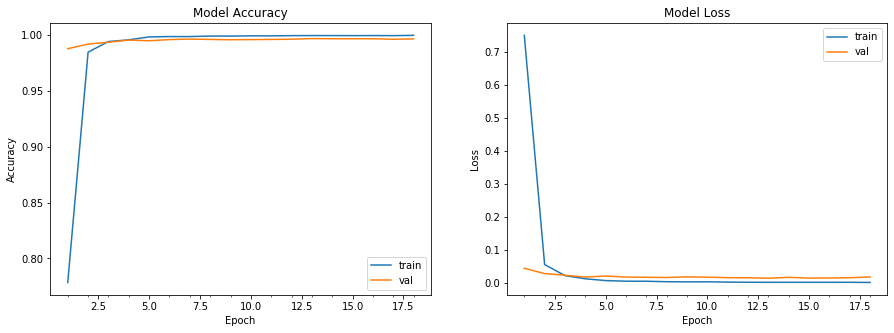

6736/6736 [==============================] - 7s 1ms/step

Validation accuracy: 99.67


In [0]:
#Plotting the accuracy and loss against the number of epochs
accuracy_loss_plot(model_history)

# Accuracy of validation dataset
validation_loss, validation_accuracy = cnn_resnet.evaluate(X_val_parameters, y_val_category)
print('\nValidation accuracy: %0.2f' %(validation_accuracy*100))

In [0]:
# Predicting the value of y for validation dataset
y_prediction = cnn_resnet.predict(X_val_parameters)
y_prediction_one_dimension = one_dimension_y_prediction(y_prediction)
accuracy = metrics.accuracy_score(y_val,y_prediction_one_dimension)
print('Validation accuracy: %0.2f' %(accuracy*100))

# Printing the classification report for the model
class_repo = metrics.classification_report(y_val,y_prediction_one_dimension)
print("Classification Report: \n\n", class_repo)

Validation accuracy: 99.67
Classification Report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       746
           1       1.00      1.00      1.00       681
           2       1.00      1.00      1.00       700
           3       0.99      1.00      0.99       698
           4       1.00      1.00      1.00       711
           5       1.00      0.99      0.99       696
           6       1.00      1.00      1.00       667
           7       1.00      1.00      1.00       602
           8       1.00      1.00      1.00       580
           9       1.00      0.99      0.99       655

    accuracy                           1.00      6736
   macro avg       1.00      1.00      1.00      6736
weighted avg       1.00      1.00      1.00      6736

